# Explore here
## Solucion del EDA para datos New York Airbnb

### Paso 1: Carga de datos

In [4]:
# Carga de las librerias de interes
import pandas as pd

# carga de la informacion
data_total = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

# visualizacion de la data
data_total.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
data_total.to_csv("../data/raw/total_data.csv", index = False)

### Paso 2: Procederemos con exploración y limpieza de los datos

In [6]:
# Veamos cual es la dimension de la informacion 
data_total.shape

(48895, 16)

El resultado anterior nos dice que el dataframe cargado contiene 48.895 registros (numero total de filas) y 16 variables (numero total de columnas).

In [8]:
# Vizualizaremos ahora información sobre los tipos de datos y valores no nulos
data_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

El resultado anterior revela que: tenemos algunos registros NaN, se destacan las columnas `last_review` y `reviews_per_month`.

En relacion a los datos, se observa que:

- Hay ocho (8) variables del tipo categoricas, estas son:
     (`id`, `name`, `host_id`, `host_name`, `neighbourhood_group`, `neighbourhood`, `room_type`, `availability_365`)
- Hay ocho (8) variables del tipo numericas, estas son: 
    (`latitude`, `longitude`, `price`, `minimum_nights`, `number_of_reviews`, `last_review`, `reviews_per_month`, `calculated_host_listings_count`)


##### En este sentido, procedamos a eliminar las duplicaciones

In [9]:
print(f"El número de registros de nombres duplicados es: {data_total['name'].duplicated().sum()}")
print(f"La cantidad de registros de ID de host duplicados es: {data_total['host_id'].duplicated().sum()}")
print(f"El número de registros de identificación duplicados es: {data_total['id'].duplicated().sum()}")

El número de registros de nombres duplicados es: 989
La cantidad de registros de ID de host duplicados es: 11438
El número de registros de identificación duplicados es: 0


Lo anterior revela que:

- `name` tiene valores duplicados, ya que las personas pueden escribir los mismos nombres
- `host_id` puede tener duplicados, porque algunos dueños pueden tener varios Airbnb registrados.
- Hay 0 `id` duplicados, lo que significa que todos son registros únicos.

#### Ahora procederemos a eliminar aquella información que no aporte al analisis

In [10]:
data_total.drop(["id", "name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)

# visualicemos como quedo la data
data_total.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


Con esto realizado procedemos con:

### Paso 3: Análisis estadistico univariado

Para ello comenzaremos con:

#### Análisis de variables categóricas

Vizualicemos en primera instancia el grafico de sus distribuciones empiricas, esto es posible mediante los histogramas


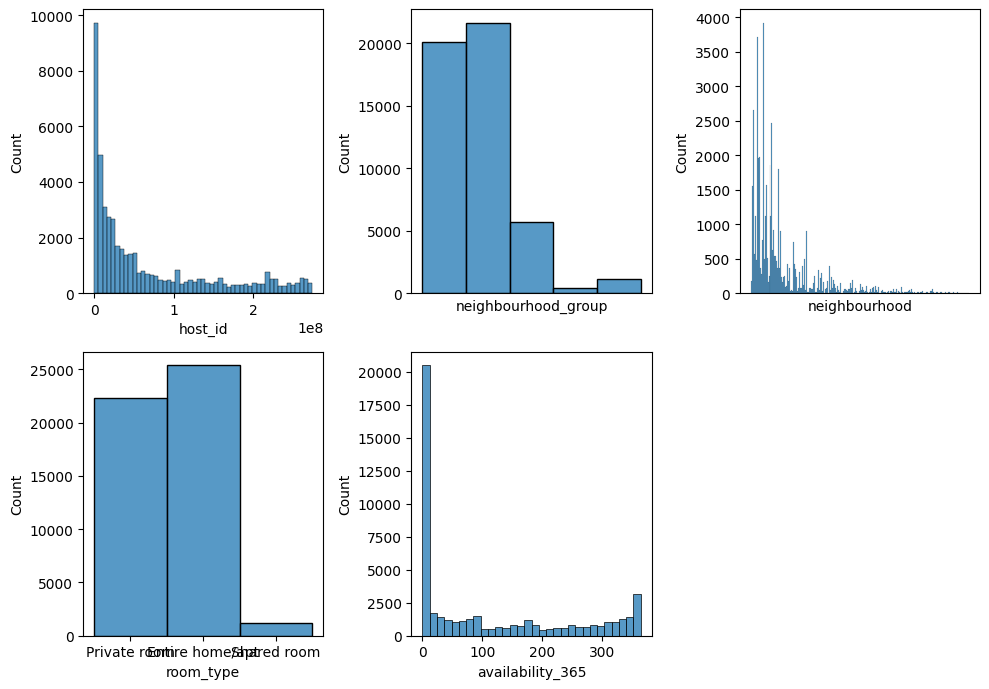

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize=(10, 7))

# Create Histogram
sns.histplot(ax = axis[0,0], data = total_data, x = "host_id")
sns.histplot(ax = axis[0,1], data = total_data, x = "neighbourhood_group").set_xticks([])
sns.histplot(ax = axis[0,2], data = total_data, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1,0], data = total_data, x = "room_type")
sns.histplot(ax = axis[1,1], data = total_data, x = "availability_365")
fig.delaxes(axis[1, 2])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Los histogramas revelan lo siguiente:

* Algunos anfitriones poseen muchas habitaciones con el fin alquilar. Y hay muchos valores ausentes del tipo "NaN" para "host_id".

*Se disponen de cinco (5) localidades, estas son: Brooklyn, Manhattan, Queens, Staten Island y el Bronx; Estas cinco (5) localidades, refleja que la geografia que estamos estudiando esta ubicada en Nueva York.

*Se evidencia que hay localidades que presentan mas ofertas para habitaciones Airbnb que otras.

*Se aprecian más propiedades (entre casas y apartamentos) disponibles para alquilar contra las habitaciones (del tipo privadas y compartidas).

*La gran mayoria de las habitaciones están disponibles todo el año. Sin embargo, el conjunto de datos posee muchos valores ausentes del tipo 0/NaN para la categoría. Esto podria ser un error en la recoleccion de la informacion o ausencia de la misma.